## Итоговая работа
### Студент: Земов В.А.
### Группа: РИМ-130908


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('salary_.csv', encoding="CP1251", sep=";")

**'Т/Н'**	- табельный номер;

**'Должность';**

**'Ставка'**	- часть ставки, на которую заключен трудовой договор;

**'Код  подразд.'**	- код подразделения по внутреннему классификатору;

**'Оклад (ставка) по основному месту работы';**

**'Оклад (ставка) на работе по совместительству';**

**'Всего. руб.'** 	- общая сумма заработной платы.


Обратите внимание, сотрудники идентифицируются по табельному номеру, на некоторых работников есть несколько записей – 
у них есть внутреннее совместительство, существуют сотрудники, у которых есть зарплата только по основному месту работы, 
есть основное и внутреннее совместительство, есть внешние совместители – у них нет оклада по основному месту работы в 
данной организации.

In [3]:

df


,Т/Н,Должность,Ставка,Код подразд.,Оклад (ставка) по основному месту работы,Оклад (ставка) на работе по совместительству,Всего. руб.
0,160697,Доцент,1.50,17011.0,9830.00,4915.0,30105.51
1,2226,Доцент,0.50,17017.0,3880.26,NaN,7974.75
2,302429,Доцент,0.05,17052.0,NaN,491.5,1435.72
3,302429,Доцент,0.45,17054.0,NaN,4423.5,12923.00
4,1139,Доцент,1.20,17017.0,9830.00,1966.0,18873.60
...,...,...,...,...,...,...,...
807,595,Доцент,1.50,170605.0,9830.00,4915.0,33995.70
808,70746,Старший преподаватель,1.30,170602.0,8623.00,2586.9,14572.87
809,70794,Доцент,1.50,170605.0,9830.00,4915.0,28228.10
810,4641,Доцент,1.35,170609.0,9830.00,3440.5,22559.86


## 1. Вывод Фонда оплаты труда(ФОТ):

### а) всей организации – float r1a;

### б) в разрезе должностей – list r1b;

### в) ФОТ организации без учёта внешних совместителей – float r1c;

### г) ФОТ внешних совместителей – float r1d.

**Ответ:** 	list r1=[r1a, r1b, r1c, r1d]


In [4]:
# Добавляем нижнее подчеркивание вместо пробелов в названия колонок
column = []
for name in df.columns:
    name = name.replace(" ", "_")
    column.append(name)
    
df.columns = column
df

,Т/Н,Должность,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
0,160697,Доцент,1.50,17011.0,9830.00,4915.0,30105.51
1,2226,Доцент,0.50,17017.0,3880.26,NaN,7974.75
2,302429,Доцент,0.05,17052.0,NaN,491.5,1435.72
3,302429,Доцент,0.45,17054.0,NaN,4423.5,12923.00
4,1139,Доцент,1.20,17017.0,9830.00,1966.0,18873.60
...,...,...,...,...,...,...,...
807,595,Доцент,1.50,170605.0,9830.00,4915.0,33995.70
808,70746,Старший преподаватель,1.30,170602.0,8623.00,2586.9,14572.87
809,70794,Доцент,1.50,170605.0,9830.00,4915.0,28228.10
810,4641,Доцент,1.35,170609.0,9830.00,3440.5,22559.86


In [5]:
#Типы данных полей

df.dtypes

Т/Н                                               int64
Должность                                        object
Ставка                                          float64
Код__подразд.                                   float64
Оклад_(ставка)_по_основному_месту_работы        float64
Оклад_(ставка)_на_работе_по_совместительству    float64
Всего._руб.                                     float64
dtype: object

In [6]:
#Просматриваем статистические данные
df.describe()

,Т/Н,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
count,812.000000,812.000000,739.000000,594.000000,564.000000,812.000000
mean,154988.242611,0.938719,104422.320704,7510.554865,3379.690585,14800.734200
std,134488.949016,0.486572,77441.617673,2352.480382,1342.878954,8934.057302
min,114.000000,0.050000,101.000000,-21.610000,232.130000,-2874.550000
25%,2773.750000,0.500000,17054.000000,6353.790000,2321.290000,8019.000000
50%,160625.500000,1.000000,170206.000000,8362.150000,3932.000000,13537.495000
75%,302697.250000,1.500000,170704.000000,9312.630000,4311.500000,20586.420000
max,303622.000000,1.500000,171007.000000,10461.000000,5230.500000,50470.830000


#### a) Фонд оплаты труда всей организации

In [7]:
r1a = df['Всего._руб.'].sum()
r1a

12018196.17

#### б) Фонд оплаты труда в разрезе должностей

In [8]:
df_r1b = df.groupby(['Должность'])['Всего._руб.'].sum().reset_index()
df_r1b

,Должность,Всего._руб.
0,Ассистент,878028.88
1,Доцент,6227156.38
2,Преподаватель,564664.90
3,Профессор,1540199.77
4,Старший преподаватель,2808146.24


In [9]:
#Формируем список из кортежей
r1b = []
for i in range(len(df_r1b)):
    r1b.append((df_r1b['Должность'][i], df_r1b['Всего._руб.'][i]))  

r1b

[('Ассистент', 878028.88),
 ('Доцент', 6227156.38),
 ('Преподаватель', 564664.9),
 ('Профессор', 1540199.77),
 ('Старший преподаватель', 2808146.24)]

#### в) ФОТ организации без учёта внешних совместителей 

In [10]:
#Группируем по сотрудникам (поле "Т/Н")
df_worker = df.groupby(["Т/Н"]).sum()

In [11]:
#Основной совместитель имеет оклад по основному мету работы
df_r1c = df_worker[df_worker['Оклад_(ставка)_по_основному_месту_работы'] != 0].sort_values(['Всего._руб.']).reset_index()
df_r1c

,Т/Н,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
0,303612,0.05,17054.0,400.95,0.00,805.50
1,178489,0.10,170702.0,801.90,0.00,882.09
2,2018,0.10,170703.0,801.90,0.00,1042.47
3,303534,0.15,1811.0,1202.85,0.00,1202.85
4,70857,0.30,170703.0,512.49,0.00,1459.82
...,...,...,...,...,...,...
589,2146,1.40,17015.0,9830.00,3932.00,40875.76
590,302606,1.50,17091.0,10461.00,5230.50,41790.73
591,2136,1.50,171005.0,6353.79,3176.89,44776.56
592,2043,1.50,170704.0,9830.00,4915.00,45683.32


In [12]:
r1c = df_r1c['Всего._руб.'].sum()
r1c

10452303.959999999

#### г) ФОТ внешних совместителей

In [13]:
#Внешний совместитель не имеет оклад по основному мету работы
df_r1d = df_worker[df_worker['Оклад_(ставка)_по_основному_месту_работы'] == 0].sort_values(['Всего._руб.']).reset_index()
df_r1d 

,Т/Н,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
0,303082,2.25,341214.0,0.0,0.00,334.40
1,1006,0.05,170701.0,0.0,400.95,521.24
2,302130,0.20,17045.0,0.0,1603.80,1603.80
3,302917,0.25,17091.0,0.0,2004.75,2004.75
4,303420,0.20,0.0,0.0,1642.40,2093.20
...,...,...,...,...,...,...
139,5601,0.25,341411.0,0.0,2457.50,26317.74
140,301766,0.50,170605.0,0.0,5230.50,26950.86
141,303508,0.50,170607.0,0.0,5230.50,27253.71
142,4968,0.50,3623.0,0.0,5230.50,30601.75


In [14]:
r1d = df_r1d['Всего._руб.'].sum()
r1d

1565892.21

**Ответ к заданию №1**

In [15]:
#Ответ к первому заданию
r1=[r1a, r1b, r1c, r1d]
r1

[12018196.17,
 [('Ассистент', 878028.88),
  ('Доцент', 6227156.38),
  ('Преподаватель', 564664.9),
  ('Профессор', 1540199.77),
  ('Старший преподаватель', 2808146.24)],
 10452303.959999999,
 1565892.21]

## 2. Вывод данных о структуре персонала по должностям и построение круговой диаграммы

**Ответ:** 	DataFrame r2 с columns=[‘Должность’, ‘Количество’],
            Круговая диаграмма


**Ответ к заданию 2**

In [16]:
# Данные о колличестве сотрудников каждой должности
r2 = df.groupby(["Т/Н", "Должность"]).sum().value_counts('Должность').reset_index().rename(columns={0:'Количество'})
r2

,Должность,Количество
0,Доцент,300
1,Старший преподаватель,216
2,Ассистент,101
3,Профессор,71
4,Преподаватель,52


(-1.1136184618332927,
 1.131325170473029,
 -1.2721576972858635,
 1.228109575860929)

<Figure size 600x120 with 0 Axes>

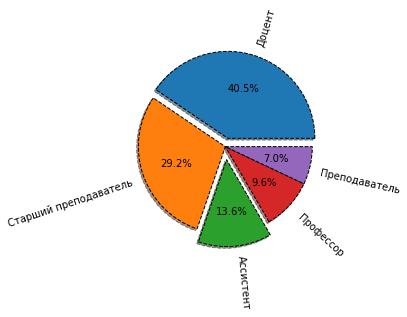

In [17]:
# Круговая диаграмма о колличестве сотрудников каждой должности
plt.figure(figsize=(5,1), dpi=120)

vals = r2["Количество"]
labels = r2["Должность"]
explode = (0.1, 0, 0.15, 0, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

## 3. Анализ заработной платы ассистентов:

### вывести минимальную (float r3a), среднюю (float r3b) и максимальнаую заработную плату (float r3c) по этой категории

**Ответ:**		list r3 = [r3a, r3b, r3c]

In [18]:
df_assist = df[df["Должность"] == "Ассистент"].groupby(['Т/Н', 'Должность']).sum().reset_index()
df_assist

,Т/Н,Должность,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
0,518,Ассистент,1.00,182.0,8019.00,0.00,8019.00
1,1457,Ассистент,0.90,1812.0,7217.10,0.00,9382.23
2,2280,Ассистент,1.00,17035.0,8019.00,0.00,11226.60
3,2707,Ассистент,0.30,170202.0,0.00,2405.70,3127.41
4,4568,Ассистент,0.45,17031.0,0.00,3608.55,4330.26
...,...,...,...,...,...,...,...
96,303510,Ассистент,1.00,0.0,8019.00,0.00,8019.00
97,303534,Ассистент,0.15,1811.0,1202.85,0.00,1202.85
98,303539,Ассистент,0.50,170605.0,4009.50,0.00,4009.50
99,303576,Ассистент,1.10,170704.0,8019.00,801.90,11467.17


In [19]:
#Минимальная зарплата ассистента
r3a = df_assist["Всего._руб."].min()
r3a = round(r3a, 2)
r3a

334.4

In [20]:
#Средняя зарплата ассистента
r3b = df_assist["Всего._руб."].mean()
r3b = round(r3b, 2)
r3b

8693.36

In [21]:
#Максимальная зарплата ассистента
r3c = df_assist["Всего._руб."].max()
r3c

21484.59

**Ответ к заданию 3**

In [22]:
r3 = [r3a, r3b, r3c]
r3

[334.4, 8693.36, 21484.59]

## 4. Анализ доцентов-внешних совместителей. 

### Выведите таблицу с их группировкой по табельному номеру, представьте в таблице общую величину ставки и сумму заработной платы: (DataFrame r4a с columns=[‘Т/Н’, ‘Ставка’, ‘Оклад’]). 

### Выведите их численность с учётом группировки – int r4b.

**Ответ:**		list r4 = [r4a, r4b]


In [23]:
#Группируем по "Т/Н" и фильтруем по должности "Доцент"
df_docent = df[df["Должность"] == "Доцент"].groupby(["Т/Н"]).sum()
#Фильтруем по должности "Доцент"-внешний совместитель
df_docent_ext = df_docent[df_docent['Оклад_(ставка)_по_основному_месту_работы'] == 0]
#Переименовываем колонки
df_docent_ext = df_docent_ext.rename(columns={'Оклад_(ставка)_на_работе_по_совместительству':'Оклад'}).\
                reset_index()

df_docent_ext

,Т/Н,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад,Всего._руб.
0,1341,0.25,171007.0,0.0,2457.50,12093.36
1,1469,0.50,1812.0,0.0,4915.00,8355.50
2,2397,0.50,170707.0,0.0,4915.00,8355.50
3,2652,0.50,17035.0,0.0,4915.00,8355.50
4,2797,0.50,17041.0,0.0,4915.00,22764.48
5,4232,0.50,170707.0,0.0,4656.32,8197.72
6,4420,0.50,17055.0,0.0,4009.50,15668.67
7,5196,0.30,170804.0,0.0,2949.00,6005.24
8,5601,0.25,341411.0,0.0,2457.50,26317.74
9,5721,0.38,341217.0,0.0,3342.20,6565.26


**Ответ к заданию 4**

In [24]:
r4a = df_docent_ext[["Т/Н", "Ставка", "Оклад"]]
r4b = len(r4a)
r4 = [r4a, r4b]
r4

[       Т/Н  Ставка    Оклад
 0     1341    0.25  2457.50
 1     1469    0.50  4915.00
 2     2397    0.50  4915.00
 3     2652    0.50  4915.00
 4     2797    0.50  4915.00
 5     4232    0.50  4656.32
 6     4420    0.50  4009.50
 7     5196    0.30  2949.00
 8     5601    0.25  2457.50
 9     5721    0.38  3342.20
 10    9709    0.50  4915.00
 11    9931    0.25  2457.50
 12   70184    0.50  3621.58
 13   74235    0.50  4915.00
 14  100784    0.50  4915.00
 15  102413    0.50  4915.00
 16  103197    0.15  1474.50
 17  104509    0.40  3932.00
 18  104690    0.50  4311.50
 19  105337    0.50  4915.00
 20  106199    0.50  4915.00
 21  164665    0.50  4009.50
 22  173123    0.50  4311.50
 23  174266    0.30  2949.00
 24  302429    0.50  4915.00
 25  302455    0.30  2405.70
 26  302514    0.50  4915.00
 27  302689    0.50  4915.00
 28  302832    0.50  4915.00
 29  302855    0.50  4915.00
 30  302857    0.15  1474.50
 31  302873    0.40  3932.00
 32  302940    0.40  3932.00
 33  303395   

## 5. Анализ заработной платы работников (с учётом совместительства), работающих в данной организации по основному месту работы. 

### Вывести минимальную (float r5a), среднюю (float r5b) и максимальную заработную плату (float r5c) по этой категории.

**Ответ:** 	list r5 = [r5a, r5b, r5c]

In [25]:
#Группируем по "Т/Н"
df_job_combi = df.groupby(["Т/Н"]).sum()
#Фильтруем по внутренней совмещености
df_job_combi = df_job_combi[df_job_combi['Оклад_(ставка)_по_основному_месту_работы'] != 0]

df_job_combi

,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
Т/Н,,,,,
114,1.00,17045.0,9830.00,0.00,17595.70
186,1.50,170704.0,6353.79,3176.89,18036.04
432,1.50,183.0,10461.00,5230.50,29500.03
477,1.00,17052.0,10461.00,0.00,19666.68
481,1.50,17056.0,8623.00,4311.50,21600.67
...,...,...,...,...,...
303567,1.00,0.0,6898.32,0.00,9933.58
303576,1.10,170704.0,8019.00,801.90,11467.17
303612,0.05,17054.0,400.95,0.00,805.50


In [26]:
#Минимальная зарплата работников (с учётом совместительства), работающих в данной организации по основному месту работы
r5a = df_job_combi["Всего._руб."].min()
r5a

805.5

In [27]:
#Средняя зарплата работников (с учётом совместительства), работающих в данной организации по основному месту работы
r5b = df_job_combi["Всего._руб."].mean()
r5b = round(r5b, 2)
r5b 

17596.47

In [28]:
#Максимальная зарплата работников (с учётом совместительства), работающих в данной организации по основному месту работы
r5c = df_job_combi["Всего._руб."].max()
r5c

55773.53

**Ответ к заданию 5**

In [29]:
r5 = [r5a, r5b, r5c]
r5

[805.5, 17596.47, 55773.53]

## 6. Анализ ставок внешних совместителей: 

### Вывести минимальную (float r6a), среднюю (float r6a) и максимальную ставку (float r6a) по этой категории.

**Ответ:** 	list r6 = [r6a, r6b, r6c]


In [30]:
#Внешний совместитель имеет оклад по основному мету работы
df_r6 = df_worker[df_worker['Оклад_(ставка)_по_основному_месту_работы'] == 0].reset_index()
df_r6

,Т/Н,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
0,256,0.50,170703.0,0.0,4009.50,4811.40
1,1006,0.05,170701.0,0.0,400.95,521.24
2,1054,0.50,101.0,0.0,2954.37,5066.24
3,1180,0.50,17041.0,0.0,5230.50,25065.75
4,1181,0.35,0.0,0.0,3018.05,3319.86
...,...,...,...,...,...,...
139,303505,0.30,170807.0,0.0,2586.90,8985.96
140,303506,0.40,17162.0,0.0,3449.20,13479.22
141,303508,0.50,170607.0,0.0,5230.50,27253.71
142,303559,0.15,170207.0,0.0,1293.45,3766.97


In [31]:
#Минимальная ставка внешних совместителей
r6a = df_r6["Ставка"].min()
r6a

0.05

In [32]:
#Средняя ставка внешних совместителей
r6b = df_r6["Ставка"].mean()
r6b = round(r6b, 2)
r6b

0.4

In [33]:
#Максимальная ставка внешних совместителей (максимальная ставка может образовываться из суммы ставок)
r6c = df_r6["Ставка"].max()
r6c

2.25

**Ответ к заданию 6**

In [34]:
r6 = [r6a, r6b, r6c]
r6

[0.05, 0.4, 2.25]

## 7. Вывод список доцентов, работающих на 1,0 ст.

**Ответ:** 	DataFrame r7 с columns=[‘Т/Н’, ‘Ставка’]


In [35]:
#Данные из задания 4
df_docent

,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
Т/Н,,,,,
114,1.00,17045.0,9830.00,0.00,17595.70
481,1.50,17056.0,8623.00,4311.50,21600.67
527,1.50,34186.0,9830.00,4915.00,37487.22
528,1.50,182.0,9830.00,4915.00,25066.50
540,1.00,171002.0,8623.00,0.00,12503.35
...,...,...,...,...,...
303483,0.75,341610.0,3621.58,1810.79,11808.97
303495,0.50,17162.0,0.00,2451.34,8194.47
303524,0.50,170807.0,3621.58,0.00,7382.99


In [36]:
#Фильтруем по ставке = 1
df_docent_one = df_docent[df_docent["Ставка"] == 1].reset_index()
df_docent_one 

,Т/Н,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
0,114,1.0,17045.0,9830.00,0.00,17595.70
1,540,1.0,171002.0,8623.00,0.00,12503.35
2,585,1.0,17163.0,9830.00,0.00,16711.00
3,1204,1.0,17045.0,9830.00,0.00,17694.00
4,1504,1.0,170803.0,9830.00,0.00,16711.00
5,1616,1.0,171006.0,9830.00,0.00,16711.00
6,1651,1.0,170207.0,9830.00,0.00,16711.00
7,2263,1.0,17017.0,9830.00,0.00,23215.32
8,2293,1.0,17031.0,9830.00,0.00,17694.00
9,2328,1.0,17033.0,9830.00,0.00,17694.00


**Ответ к заданию 7**

In [37]:
r7 = df_docent_one[['Т/Н', 'Ставка']]
r7

,Т/Н,Ставка
0,114,1.0
1,540,1.0
2,585,1.0
3,1204,1.0
4,1504,1.0
5,1616,1.0
6,1651,1.0
7,2263,1.0
8,2293,1.0
9,2328,1.0


## 8. Найти самого незагруженного по основному месту работы сотрудника.

**Ответ:** 	DataFrame r8 с columns=[‘Т/Н’, ‘Ставка’]


In [38]:
#Кто имеет оклад по основному мету работы
df_min_load = df[df['Оклад_(ставка)_по_основному_месту_работы'].notna()]
df_min_load

,Т/Н,Должность,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
0,160697,Доцент,1.50,17011.0,9830.00,4915.0,30105.51
1,2226,Доцент,0.50,17017.0,3880.26,NaN,7974.75
4,1139,Доцент,1.20,17017.0,9830.00,1966.0,18873.60
5,303243,Ассистент,1.00,170703.0,7596.95,NaN,8597.66
6,303209,Профессор,1.50,17053.0,9830.00,4915.0,27425.70
...,...,...,...,...,...,...,...
807,595,Доцент,1.50,170605.0,9830.00,4915.0,33995.70
808,70746,Старший преподаватель,1.30,170602.0,8623.00,2586.9,14572.87
809,70794,Доцент,1.50,170605.0,9830.00,4915.0,28228.10
810,4641,Доцент,1.35,170609.0,9830.00,3440.5,22559.86


In [39]:
#Убеждаемся, что сотрудник с минимальной загруженностью всего один
df_min_load = df_min_load.sort_values(['Ставка'], ascending=True)
df_min_load

,Т/Н,Должность,Ставка,Код__подразд.,Оклад_(ставка)_по_основному_месту_работы,Оклад_(ставка)_на_работе_по_совместительству,Всего._руб.
308,303612,Ассистент,0.05,17054.0,400.95,NaN,805.50
758,2018,Преподаватель,0.10,170703.0,801.90,NaN,1042.47
303,178489,Преподаватель,0.10,170702.0,801.90,NaN,882.09
620,1602,Профессор,0.15,17093.0,1569.15,NaN,2950.01
406,303534,Ассистент,0.15,1811.0,1202.85,NaN,1202.85
...,...,...,...,...,...,...,...
359,8967,Преподаватель,1.50,182.0,8019.00,4009.5,15637.05
353,161169,Доцент,1.50,17044.0,9830.00,4915.0,19905.75
351,302945,Старший преподаватель,1.50,NaN,8623.00,4311.5,15855.00
376,302393,Старший преподаватель,1.50,17056.0,8623.00,4311.5,17143.90


**Ответ к заданию 8**

In [40]:
r8 = df_min_load.iloc[:1,[0, 2]].reset_index(drop= True)
r8 

,Т/Н,Ставка
0,303612,0.05


## 9. Построение графиков формирования ФОТ от меньших зарплат к большим для:

### а) всей организации;

### б) работников, чьё основное место работы находится в организации (с учётом внутреннего совместительства); df_r1c

### в) внешних совместителей. df_r1d


# Результат выполненной работы 

In [41]:
r = [r1, r2, r3, r4, r5, r6, r7, r8]
r

[[12018196.17,
  [('Ассистент', 878028.88),
   ('Доцент', 6227156.38),
   ('Преподаватель', 564664.9),
   ('Профессор', 1540199.77),
   ('Старший преподаватель', 2808146.24)],
  10452303.959999999,
  1565892.21],
                Должность  Количество
 0                 Доцент         300
 1  Старший преподаватель         216
 2              Ассистент         101
 3              Профессор          71
 4          Преподаватель          52,
 [334.4, 8693.36, 21484.59],
 [       Т/Н  Ставка    Оклад
  0     1341    0.25  2457.50
  1     1469    0.50  4915.00
  2     2397    0.50  4915.00
  3     2652    0.50  4915.00
  4     2797    0.50  4915.00
  5     4232    0.50  4656.32
  6     4420    0.50  4009.50
  7     5196    0.30  2949.00
  8     5601    0.25  2457.50
  9     5721    0.38  3342.20
  10    9709    0.50  4915.00
  11    9931    0.25  2457.50
  12   70184    0.50  3621.58
  13   74235    0.50  4915.00
  14  100784    0.50  4915.00
  15  102413    0.50  4915.00
  16  103197    0.1

#### Построение графиков из задания 9

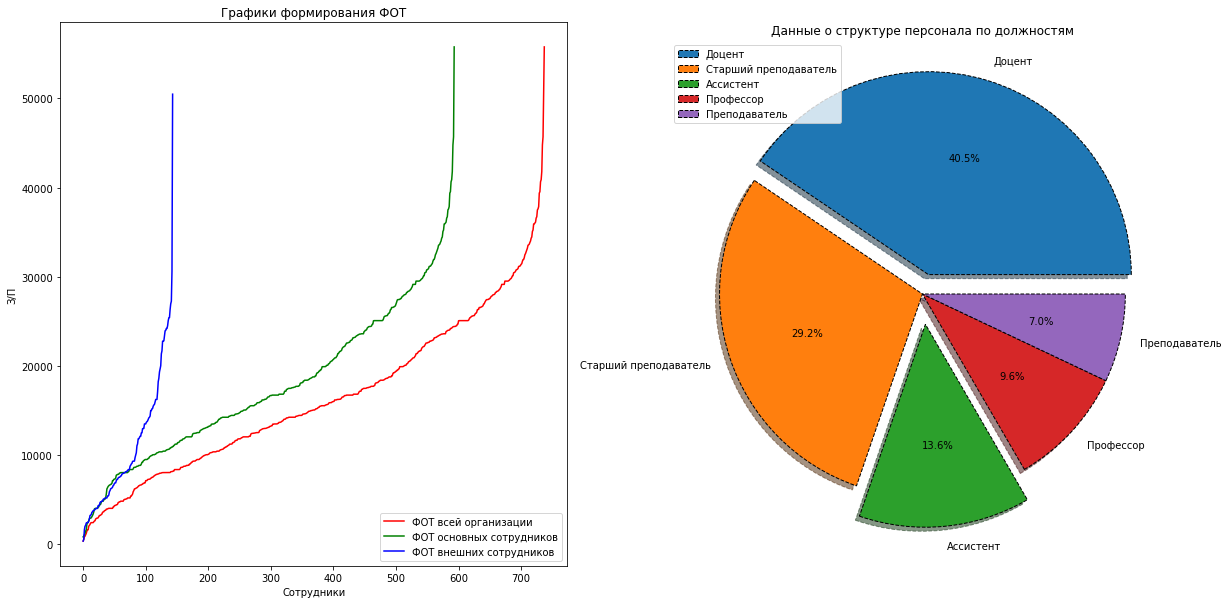

In [44]:

df = df.groupby('Т/Н').sum().reset_index().sort_values('Всего._руб.').reset_index(drop=True)
fig, axes = plt.subplots(1, 2, figsize=(20,10))
#plt.figure(figsize=(18,8))
X_1 = df.index
Y_1 = df['Всего._руб.']
X_2 = df_r1c.index
Y_2 = df_r1c['Всего._руб.'][df_r1c['Всего._руб.'] > 0]
X_3 = df_r1d.index
Y_3 = df_r1d['Всего._руб.']

axes[0].plot(X_1, Y_1, "r", label='ФОТ всей организации')
axes[0].plot(X_2, Y_2, "g", label='ФОТ основных сотрудников')
axes[0].plot(X_3, Y_3, "b", label='ФОТ внешних сотрудников')
axes[0].set_title("Графики формирования ФОТ")
axes[0].set_ylabel('З/П')
axes[0].set_xlabel('Сотрудники')
axes[0].legend(loc=4)

axes[1].pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
axes[1].set_title('Данные о структуре персонала по должностям')
axes[1].legend(loc=2)